In [1]:
import glob
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
model_to_index = {
    'falcon-40b': 0,
    'falcon-40b-lang-1': 1,
    'falcon-40b-lang-10': 2,
    'falcon-40b-lang-45': 3,
    'falcon-7b': 4,
    'falcon-7b-lang-1': 5,
    'falcon-7b-lang-2': 6,
    'falcon-7b-lang-3': 7,
    'falcon-7b-lang-5': 8,
    'falcon-7b-lang-10': 9,
    'falcon-7b-lang-20': 10,
    'falcon-7b-lang-45': 11
}

model_to_color = {
    'falcon-40b': 'gray',
    'falcon-40b-lang-1': 'gray',
    'falcon-40b-lang-10': 'gray',
    'falcon-40b-lang-45': 'gray',
    'falcon-7b': 'g',
    'falcon-7b-lang-1': 'g',
    'falcon-7b-lang-2': 'g',
    'falcon-7b-lang-3': 'g',
    'falcon-7b-lang-5': 'g',
    'falcon-7b-lang-10': 'g',
    'falcon-7b-lang-20': 'g',
    'falcon-7b-lang-45': 'g'
}

### Check NLU Per Dataset

In [3]:
dfs = []
for path in glob.glob('metrics_nlu/*.csv'):
    model = path[:-4].split('_')[-1]
    if 'falcon' not in model or 'lang' not in model:
        continue
        
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['accuracy'] = df['accuracy'].astype(float) * 100
    df['macro_f1_score'] = df['macro_f1_score'].astype(float) * 100
    df['weighted_f1_score'] = df['weighted_f1_score'].astype(float) * 100
    df['model'] = model
    df['model_index'] = model_to_index[model]
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)

In [4]:
df.shape, df.dropna().shape

((110, 16), (110, 16))

In [5]:
df = df.dropna()

In [12]:
df[(df['lang'] == 'eng') & (~df['dataset'].str.contains('qnli'))].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

,,accuracy,macro_f1_score,weighted_f1_score
model,lang,,,
falcon-40b-lang-1,eng,50.046113,40.324073,40.542766
falcon-40b-lang-10,eng,48.984290,38.094873,39.264421
falcon-40b-lang-45,eng,51.877461,42.902987,44.661515
falcon-7b-lang-1,eng,48.847527,38.585985,39.440671
falcon-7b-lang-10,eng,48.730588,38.250758,38.906228
falcon-7b-lang-2,eng,51.171265,41.138630,42.779865
falcon-7b-lang-20,eng,51.997456,39.649189,41.254611
falcon-7b-lang-3,eng,49.210774,38.489950,39.056284
falcon-7b-lang-45,eng,50.637149,41.661907,42.244867


/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

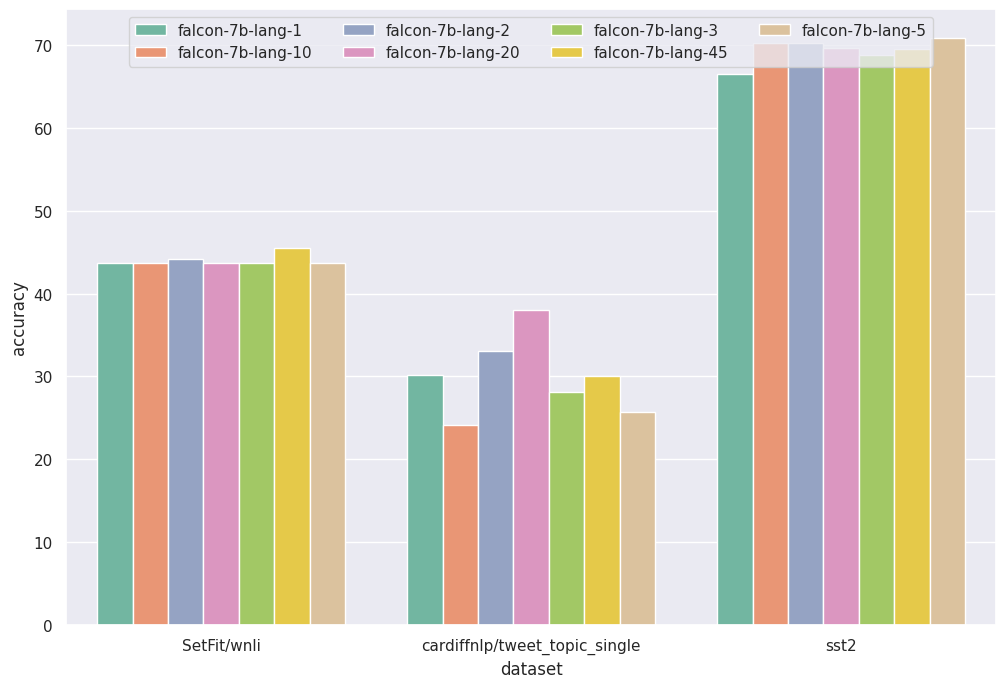

In [12]:
sns.set(rc={'figure.figsize':(12,8)})
pdf = df.loc[(df['model'].str.contains('7b')) & (~df['dataset'].str.contains('qnli'))].sort_values('model_index').groupby(['dataset', 'model'])['accuracy'].mean().reset_index()
sns.barplot(data=pdf, x='dataset', y='accuracy', hue='model', palette='Set2')
plt.legend(ncols=4, loc='upper center')
plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

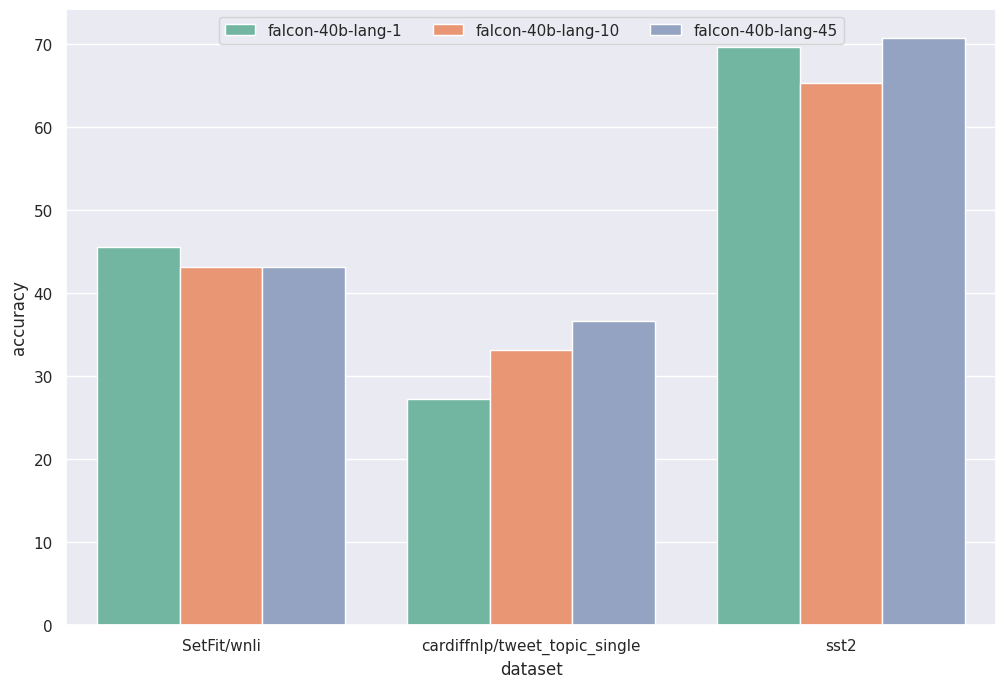

In [73]:
pdf = df.loc[(df['model'].str.contains('40b')) & (~df['dataset'].str.contains('qnli'))].sort_values('model_index').groupby(['dataset', 'model'])['accuracy'].mean().reset_index()
sns.barplot(data=pdf, x='dataset', y='accuracy', hue='model', palette='Set2')
plt.legend(ncols=5, loc='upper center')
plt.show()

/tmp/ipykernel_2853259/2985485531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=pdf, x='model', y='accuracy', palette='Set2', k_depth=5)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


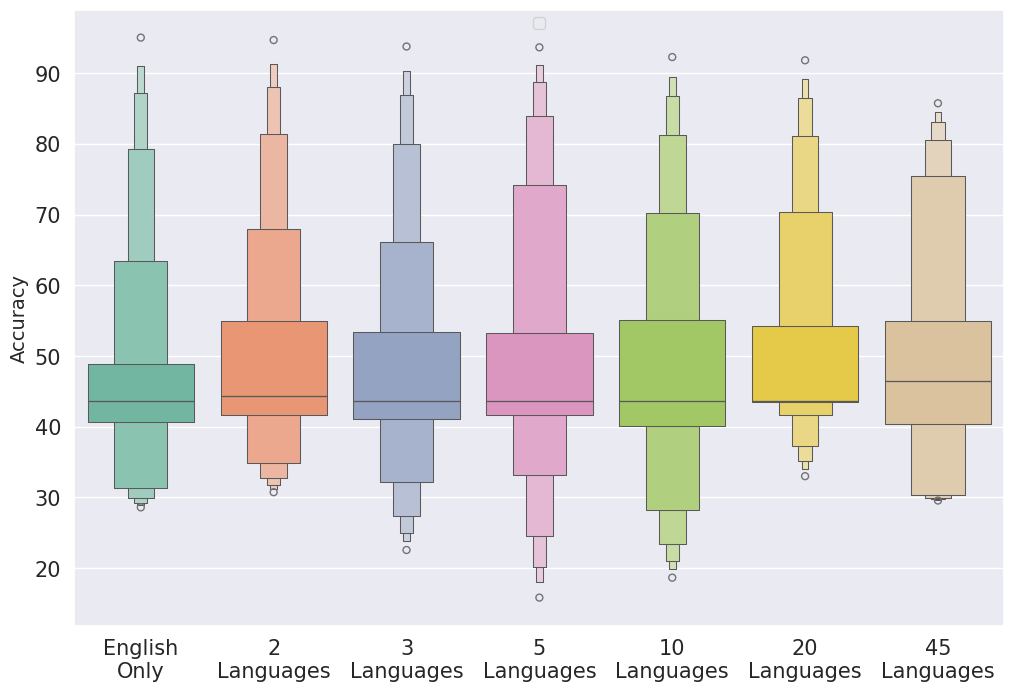

In [33]:
sns.set(rc={'figure.figsize':(12,8)})
pdf = df.loc[(df['model'].str.contains('7b')) & (~df['dataset'].str.contains('qnli'))].sort_values('model_index')
sns.boxenplot(data=pdf, x='model', y='accuracy', palette='Set2', k_depth=5)
plt.legend(ncols=4, loc='upper center')
plt.xticks([0,1,2,3,4,5,6], ['English\nOnly', '2\nLanguages', '3\nLanguages', '5\nLanguages', '10\nLanguages', '20\nLanguages', '45\nLanguages'], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Accuracy', fontsize=14)
plt.savefig('nlp_task.png', bbox_inches='tight')
plt.show()

/tmp/ipykernel_2853259/2282537415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=pdf, x='model', y='accuracy', palette='Set2', k_depth=5)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


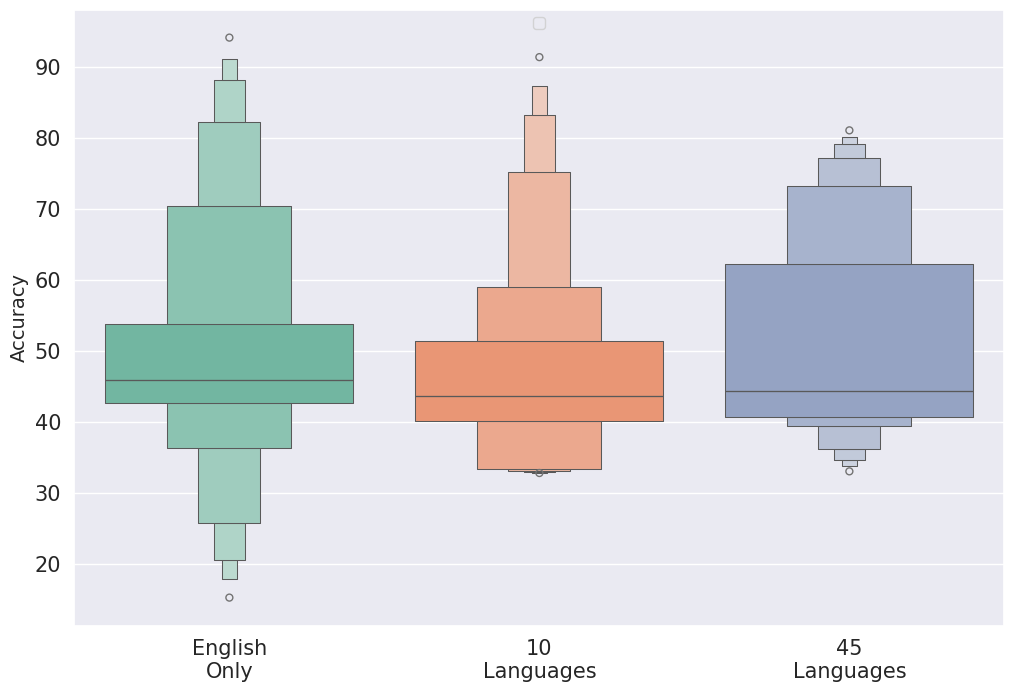

In [34]:
sns.set(rc={'figure.figsize':(12,8)})
pdf = df.loc[(df['model'].str.contains('40b')) & (~df['dataset'].str.contains('qnli'))].sort_values('model_index')
sns.boxenplot(data=pdf, x='model', y='accuracy', palette='Set2', k_depth=5)
plt.legend(ncols=4, loc='upper center')
plt.xticks([0,1,2], ['English\nOnly', '10\nLanguages', '45\nLanguages'], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Accuracy', fontsize=14)
plt.savefig('nlp_task_40b.png', bbox_inches='tight')
plt.show()

### Check ChatGPT Eval

In [165]:
dataset_to_name = {
    'sparta_qa_1reasoning': 'SpartQA (1 Reasoning)', 
    'sparta_qa_2reasoning': 'SpartQA (2 Reasoning)', 
    'timedial': 'Timedial',
    'pep_3k': 'Pep-3k', 
    'step_game_basic': 'StepGame (k=1)',
    'step_game_hard': 'StepGame (k=9)',
    'babi15': 'bAbI task 15',
    'babi16': 'bAbI task 16',
    'alpha_nli': 'αNLI',
    'clutrr': 'CLUTRR',
    'commonsenseqa': 'CommonsenseQA',
    'ecare': 'E-Care',
    'covid_fact_scientific': 'COVID-Scientific',
    'covid_fact_social': 'COVID-Social',
}

dataset_to_reasoning_type = {
    'babi15': 'Deductive',
    'babi16': 'Inductive',
    'clutrr': 'Inductive',
    'step_game_basic': 'Spatial',
    'step_game_hard': 'Spatial',
    'pep_3k': 'Commonsense',
    'alpha_nli': 'Abductive',
    'timedial': 'Temporal',
    'sparta_qa_1reasoning': 'Spatial',
    'sparta_qa_2reasoning': 'Spatial',
    'commonsenseqa': 'Commonsense',
    'ecare': 'Causal',
    'covid_fact_scientific': 'Fact Checking',
    'covid_fact_social': 'Fact Checking',
}

In [166]:
dfs = []
for path in glob.glob('metrics_chatgpt_eval/*.csv'):
    model = path[:-4].split('_')[-1]
    if 'falcon' not in model or 'lang' not in model:
        continue
        
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df = df.loc[df['dataset'] != 'ecare',:]
    
    df['accuracy'] = df['accuracy'].astype(float) * 100
    df['macro_f1_score'] = df['macro_f1_score'].astype(float) * 100
    df['weighted_f1_score'] = df['weighted_f1_score'].astype(float) * 100
    df['model'] = model
    df['reasoning'] = df['dataset'].apply(lambda x: dataset_to_reasoning_type[x])
    df['dset_name'] = df['dataset'].apply(lambda x: dataset_to_name[x])
    df['model_index'] = model_to_index[model]
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)
df = df.loc[~df['dataset'].str.contains('covid'),:]

In [167]:
df.shape, df.dropna().shape

((110, 18), (0, 18))

In [168]:
df.groupby(['reasoning', 'model'])[['accuracy']].mean().reset_index()

,reasoning,model,accuracy
0,Abductive,falcon-40b-lang-1,78.358941
1,Abductive,falcon-40b-lang-10,73.586139
2,Abductive,falcon-40b-lang-45,63.190585
3,Abductive,falcon-7b-lang-1,61.882968
4,Abductive,falcon-7b-lang-10,52.598889
5,Abductive,falcon-7b-lang-2,57.567833
6,Abductive,falcon-7b-lang-20,51.748938
7,Abductive,falcon-7b-lang-3,51.650866
8,Abductive,falcon-7b-lang-45,52.010461
9,Abductive,falcon-7b-lang-5,51.912390


In [169]:
mono_falcon_7b_df = df.loc[df['model'] == 'falcon-7b-lang-1', :]
mono_falcon_40b_df = df.loc[df['model'] == 'falcon-40b-lang-1', :]
multi_falcon_7b_df = df.loc[(df['model'] != 'falcon-7b-lang-1') & (df['model'].str.contains('7b')), :]
multi_falcon_40b_df = df.loc[(df['model'] != 'falcon-40b-lang-1') & (df['model'].str.contains('40b')), :]

In [170]:
mono_7b_avg_df = mono_falcon_7b_df.groupby(['reasoning','dataset'])[['accuracy']].mean()
mono_40b_avg_df = mono_falcon_40b_df.groupby(['reasoning','dataset'])[['accuracy']].mean()

In [171]:
multi_falcon_7b_avg_df = multi_falcon_7b_df.groupby(['model', 'reasoning', 'dataset'])[['accuracy']].mean().reset_index()
multi_falcon_40b_avg_df = multi_falcon_40b_df.groupby(['model', 'reasoning', 'dataset'])[['accuracy']].mean().reset_index()

In [172]:
dfs = []
for idx, tdf in multi_falcon_7b_avg_df.groupby('model'):
    tdf = (tdf.set_index(['reasoning','dataset']) - mono_7b_avg_df).reset_index()
    tdf['model'] = idx
    dfs.append(tdf)
multi_falcon_7b_diff_df = pd.concat(dfs)[['model','reasoning','dataset','accuracy']]
multi_falcon_7b_diff_df['model_index'] = multi_falcon_7b_diff_df['model'].apply(lambda x: model_to_index[x])

In [175]:
dfs = []
for idx, tdf in multi_falcon_40b_avg_df.groupby('model'):
    tdf = (tdf.set_index(['reasoning','dataset']) - mono_40b_avg_df).reset_index()
    tdf['model'] = idx
    dfs.append(tdf)
multi_falcon_40b_diff_df = pd.concat(dfs)[['model','reasoning','dataset','accuracy']]
multi_falcon_40b_diff_df['model_index'] = multi_falcon_40b_diff_df['model'].apply(lambda x: model_to_index[x])

In [198]:
sig_df = pd.read_csv('significance/chatgpt.csv')
sig_df = sig_df.loc[sig_df['model'].str.contains('7b'),:]

In [199]:
sig_df.pivot(index='model', columns='reasoning_type', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)

/tmp/ipykernel_2853259/3984086400.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sig_df.pivot(index='model', columns='reasoning_type', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)


reasoning_type,Abductive,Causal,Commonsense,Deductive,Inductive,Spatial,Temporal
model,,,,,,,
falcon-7b-lang-10,1,1,1,0,0,0,1
falcon-7b-lang-2,1,1,0,1,0,0,1
falcon-7b-lang-20,1,1,1,0,1,0,1
falcon-7b-lang-3,1,1,0,0,0,0,1
falcon-7b-lang-45,1,1,1,0,1,0,1
falcon-7b-lang-5,1,1,0,0,1,0,1


In [196]:
pdf = multi_falcon_7b_diff_df.groupby(['model_index','model','reasoning'])['accuracy'].mean().reset_index()
pdf.pivot(index='model', columns='reasoning', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)

/tmp/ipykernel_2853259/4030265179.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pdf.pivot(index='model', columns='reasoning', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)


reasoning,Abductive,Commonsense,Deductive,Inductive,Spatial,Temporal
model,,,,,,
falcon-7b-lang-10,-1,-1,1,-1,1,1
falcon-7b-lang-2,-1,-1,1,-1,1,1
falcon-7b-lang-20,-1,-1,1,-1,1,-1
falcon-7b-lang-3,-1,-1,1,-1,1,1
falcon-7b-lang-45,-1,-1,1,-1,-1,-1
falcon-7b-lang-5,-1,-1,1,-1,1,1


In [200]:
sigbin_df = sig_df.pivot(index='model', columns='reasoning_type', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)
sign_df = pdf.pivot(index='model', columns='reasoning', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)

/tmp/ipykernel_2853259/395902001.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sigbin_df = sig_df.pivot(index='model', columns='reasoning_type', values='probability').applymap(lambda x: 1 if x <= 0.05 else 0)
/tmp/ipykernel_2853259/395902001.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sign_df = pdf.pivot(index='model', columns='reasoning', values='accuracy').applymap(lambda x: -1 if x < 0 else 1)


In [207]:
pdf.pivot(index='model', columns='reasoning', values='accuracy')

reasoning,Abductive,Commonsense,Deductive,Inductive,Spatial,Temporal
model,,,,,,
falcon-7b-lang-10,-9.284080,-2.814877,0.9,-0.674520,0.505291,49.100968
falcon-7b-lang-2,-4.315136,-1.308939,9.5,-0.043630,1.310379,15.145228
falcon-7b-lang-20,-10.134031,-4.553645,2.0,-3.400611,0.051324,-17.219917
falcon-7b-lang-3,-10.232102,-1.554932,3.3,-1.048080,1.125789,54.702628
falcon-7b-lang-45,-9.872507,-4.908594,2.4,-3.976702,-1.784055,-6.085754
falcon-7b-lang-5,-9.970579,-2.491664,0.4,-2.627051,0.771986,13.900415


<Axes: ylabel='model'>

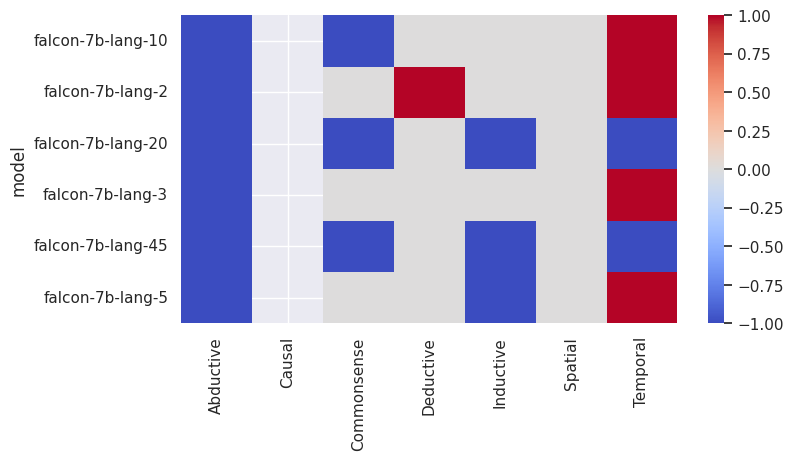

In [206]:
sns.heatmap(sigbin_df * sign_df, cmap='coolwarm', annot=)

In [ ]:
pdf.pivot(index='model', columns='reasoning', values='accuracy')

In [203]:
pdf.pivot(index='model', columns='reasoning', values='accuracy')

reasoning,Abductive,Commonsense,Deductive,Inductive,Spatial,Temporal
model,,,,,,
falcon-7b-lang-10,-9.284080,-2.814877,0.9,-0.674520,0.505291,49.100968
falcon-7b-lang-2,-4.315136,-1.308939,9.5,-0.043630,1.310379,15.145228
falcon-7b-lang-20,-10.134031,-4.553645,2.0,-3.400611,0.051324,-17.219917
falcon-7b-lang-3,-10.232102,-1.554932,3.3,-1.048080,1.125789,54.702628
falcon-7b-lang-45,-9.872507,-4.908594,2.4,-3.976702,-1.784055,-6.085754
falcon-7b-lang-5,-9.970579,-2.491664,0.4,-2.627051,0.771986,13.900415


/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


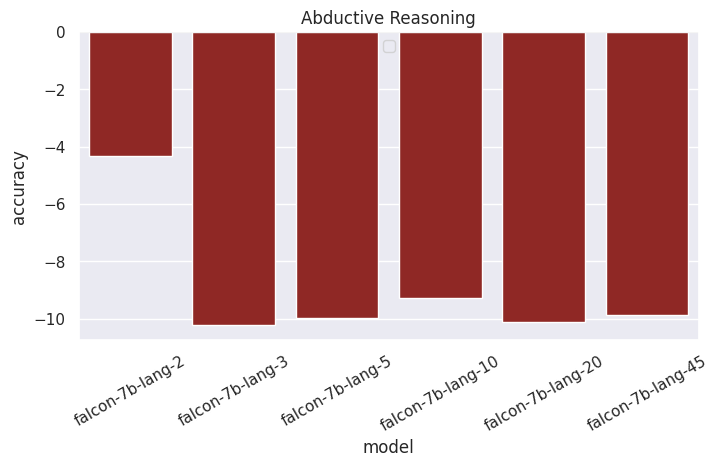

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


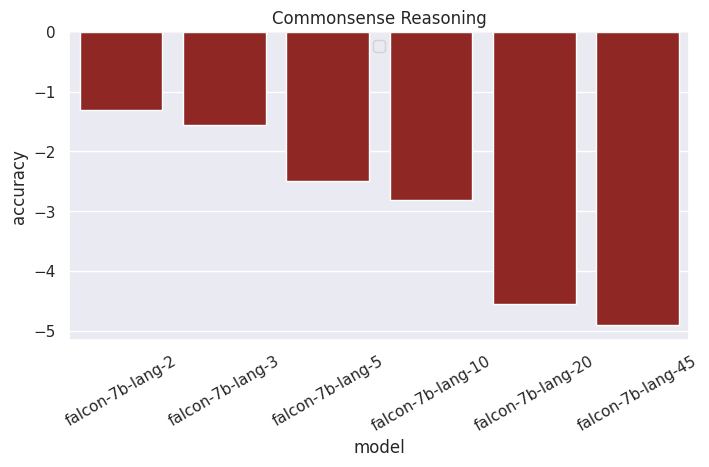

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


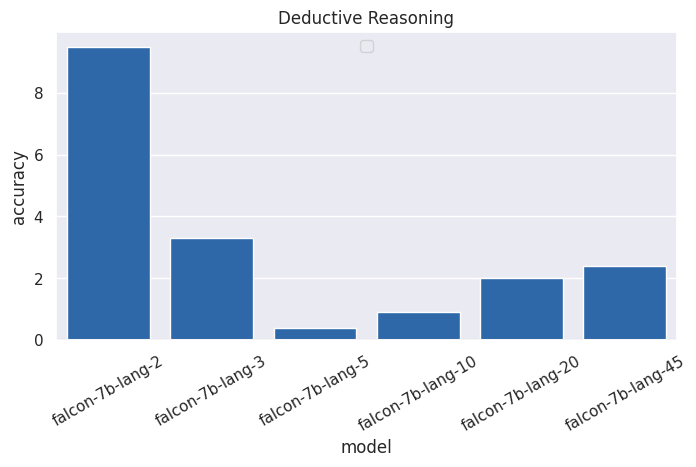

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


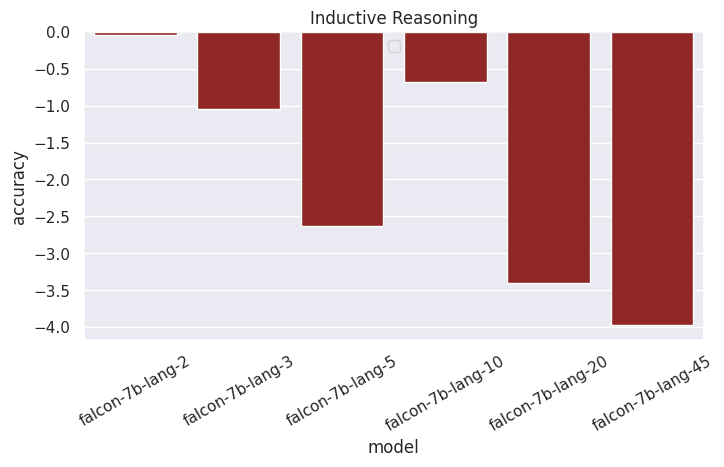

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


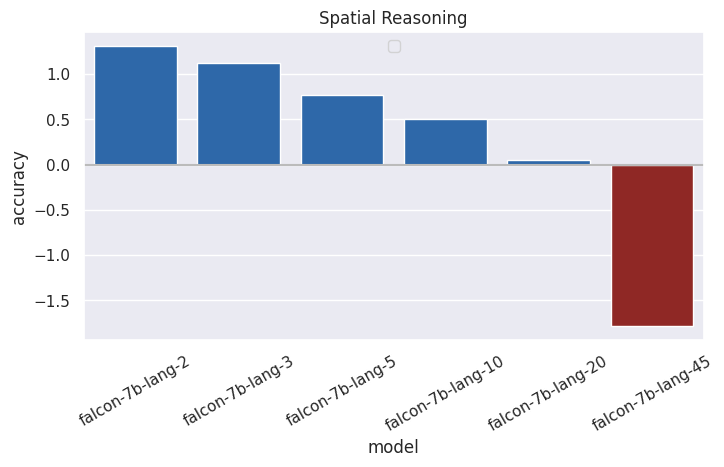

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


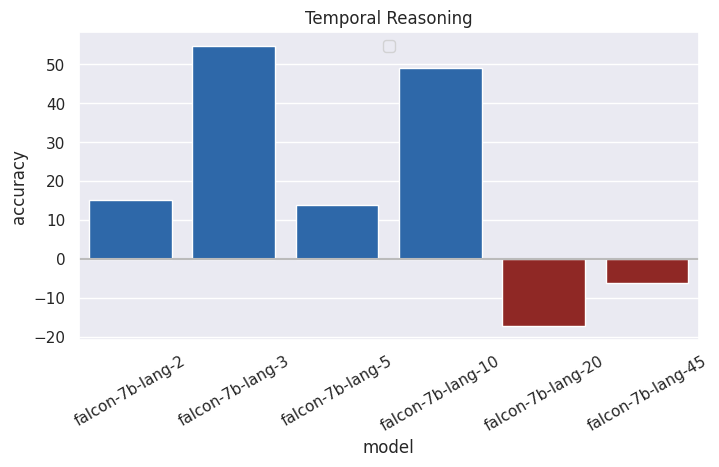

In [176]:
sns.set(rc={'figure.figsize':(8,4)})
for reasoning in multi_falcon_7b_diff_df['reasoning'].unique():
    pdf = multi_falcon_7b_diff_df.loc[
        multi_falcon_7b_diff_df['reasoning'] == reasoning, :
    ].sort_values('model_index').groupby(['model_index','model'])['accuracy'].mean().reset_index()

    pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
    score_types = list(pdf['score_type'].unique())
    colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

    ax = sns.barplot(data=pdf, x='model', y='accuracy', hue='score_type', legend=None, palette=colors)
    ax.axhline(0, ls='-', c='#BBBBBB')
    plt.legend(ncols=4, loc='upper center')
    plt.xticks(rotation=30)
    plt.title(f'{reasoning} Reasoning')
    plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


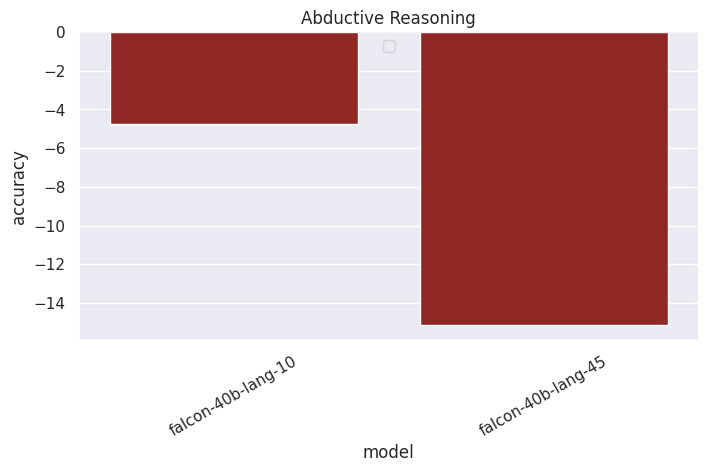

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


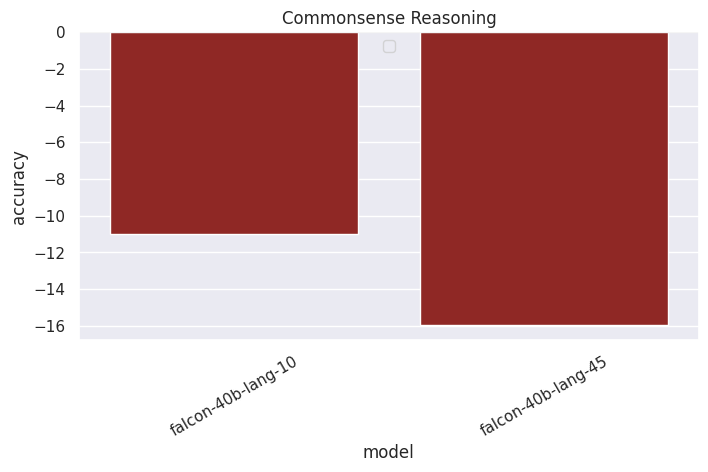

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


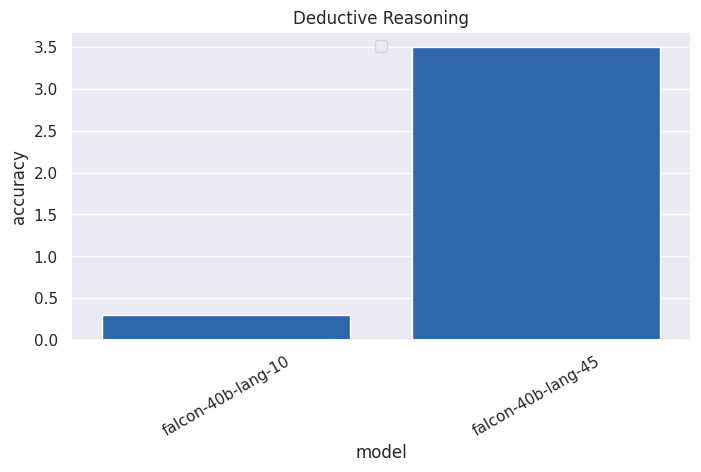

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


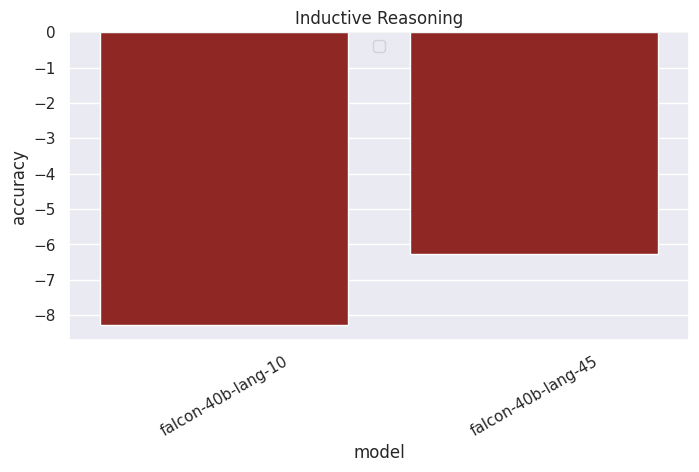

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


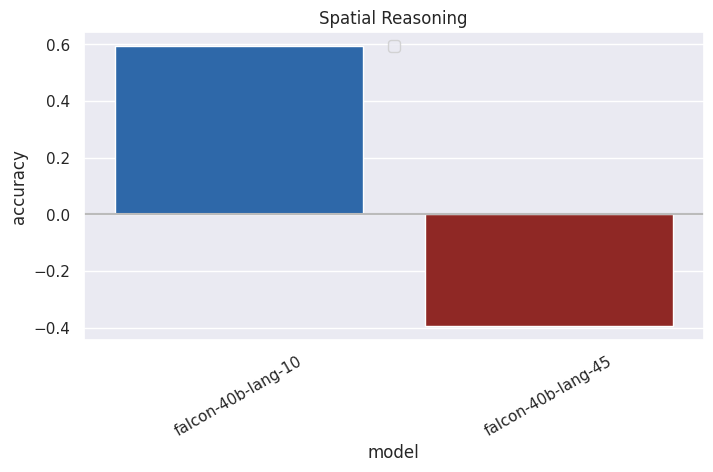

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


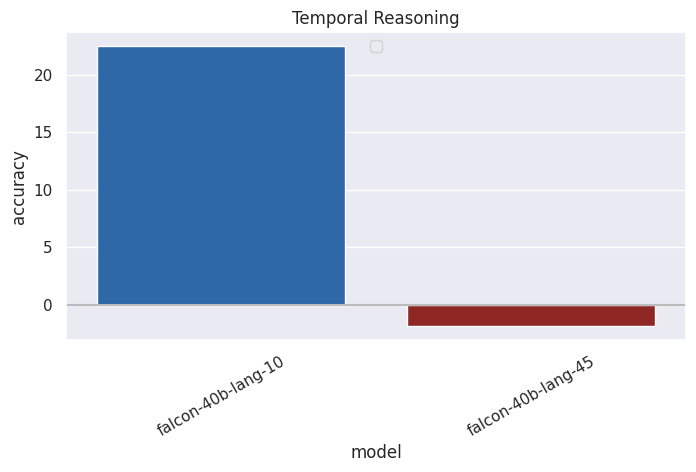

In [121]:
sns.set(rc={'figure.figsize':(8,4)})
for reasoning in multi_falcon_40b_diff_df['reasoning'].unique():
    pdf = multi_falcon_40b_diff_df.loc[
        multi_falcon_40b_diff_df['reasoning'] == reasoning
    ].sort_values('model_index').groupby(['model_index','model'])['accuracy'].mean().reset_index()
    
    pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
    score_types = list(pdf['score_type'].unique())
    colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

    ax = sns.barplot(data=pdf, x='model', y='accuracy', hue='score_type', legend=None, palette=colors)
    ax.axhline(0, ls='-', c='#BBBBBB')
    plt.legend(ncols=4, loc='upper center')
    plt.xticks(rotation=30)
    plt.title(f'{reasoning} Reasoning')
    plt.show()

In [ ]:
sns.heatmap(data, annot = labels, fmt = '')

### Check MMLU

In [122]:
mmlu_cat_df = pd.read_csv('mmlu_category.csv')
mmlu_cat_df = mmlu_cat_df.set_index('subject')

In [139]:
data = []
for path in glob.glob('results/results_falcon-*/*.csv'):
    if 'baseline' in path:
        continue
    model = path.split('results_')[1].split('/')[0]
    subject = path.split('/')[-1][:-4]
    category = mmlu_cat_df.loc[subject, 'category']
    model_index = model_to_index[model]
    
    # Get Level
    if 'high_school' in path:
        level = 'high_school'
    elif 'college' in path:
        level = 'college'
    elif 'professional' in path:
        level = 'professional'
    elif 'elementary' in path:
        level = 'elementary'
    else:
        level = 'other'
        
    # Compute Correctnesss & Accuracy
    df = pd.read_csv(path)
    num_correct = df.iloc[:,6].sum() 
    num_data = df.shape[0]
    accuracy = num_correct / num_data
    
    data.append({
        'model': model, 'model_index': model_index, 'level': level, 'subject': subject, 'category': category, 
        'num_correct': num_correct, 'num_data': num_data, 'accuracy': accuracy * 100
    })

In [140]:
df = pd.DataFrame(data)

In [141]:
mono_falcon_7b_df = df.loc[df['model'] == 'falcon-7b-lang-1', :]
mono_falcon_40b_df = df.loc[df['model'] == 'falcon-40b-lang-1', :]
multi_falcon_7b_df = df.loc[(df['model'] != 'falcon-7b-lang-1') & (df['model'].str.contains('7b')), :]
multi_falcon_40b_df = df.loc[(df['model'] != 'falcon-40b-lang-1') & (df['model'].str.contains('40b')), :]

In [142]:
mono_7b_avg_df = mono_falcon_7b_df.groupby(['category','subject','level'])[['accuracy']].mean()
mono_40b_avg_df = mono_falcon_40b_df.groupby(['category','subject','level'])[['accuracy']].mean()

In [143]:
multi_falcon_7b_avg_df = multi_falcon_7b_df.groupby(['model','category','subject','level'])[['accuracy']].mean().reset_index()
multi_falcon_40b_avg_df = multi_falcon_40b_df.groupby(['model','category','subject','level'])[['accuracy']].mean().reset_index()

In [144]:
dfs = []
for idx, tdf in multi_falcon_7b_avg_df.groupby('model'):
    tdf = (tdf.set_index(['category','subject','level']) - mono_7b_avg_df).reset_index()
    tdf['model'] = idx
    dfs.append(tdf)
multi_falcon_7b_diff_df = pd.concat(dfs)[['model','category','subject','level','accuracy']]
multi_falcon_7b_diff_df['model_index'] = multi_falcon_7b_diff_df['model'].apply(lambda x: model_to_index[x])

In [145]:
dfs = []
for idx, tdf in multi_falcon_40b_avg_df.groupby('model'):
    tdf = (tdf.set_index(['category','subject','level']) - mono_40b_avg_df).reset_index()
    tdf['model'] = idx
    dfs.append(tdf)
multi_falcon_40b_diff_df = pd.concat(dfs)[['model','category','subject','level','accuracy']]
multi_falcon_40b_diff_df['model_index'] = multi_falcon_40b_diff_df['model'].apply(lambda x: model_to_index[x])

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

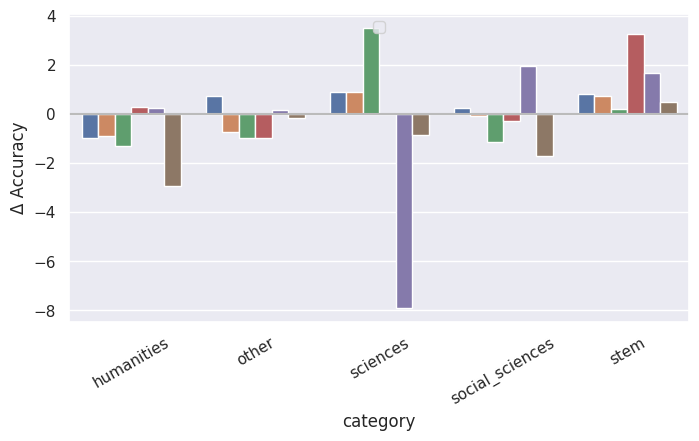

In [157]:
sns.set(rc={'figure.figsize':(8,4)})
pdf = multi_falcon_7b_diff_df.sort_values('model_index').groupby(['model_index','category','model'])['accuracy'].mean().reset_index()

pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
score_types = list(pdf['score_type'].unique())
colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

ax = sns.barplot(data=pdf, x='category', y='accuracy', hue='model', legend=None)
ax.axhline(0, ls='-', c='#BBBBBB')
plt.legend(ncols=2, loc='upper center')
plt.ylabel('Δ Accuracy')
plt.xticks(rotation=30)
plt.savefig('mmlu_category.png', bbox_inches='tight')
plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


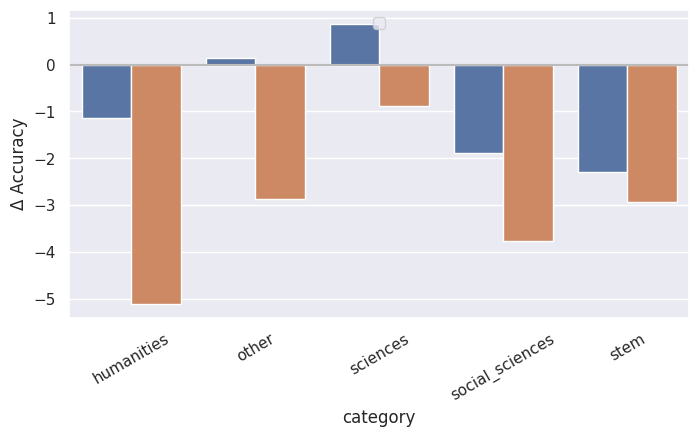

In [158]:
sns.set(rc={'figure.figsize':(8,4)})
pdf = multi_falcon_40b_diff_df.sort_values('model_index').groupby(['model_index','category','model'])['accuracy'].mean().reset_index()

pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
score_types = list(pdf['score_type'].unique())
colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

ax = sns.barplot(data=pdf, x='category', y='accuracy', hue='model', legend=None)
ax.axhline(0, ls='-', c='#BBBBBB')
plt.legend(ncols=2, loc='upper center')
plt.ylabel('Δ Accuracy')
plt.xticks(rotation=30)
plt.savefig('mmlu_category_40b.png', bbox_inches='tight')
plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

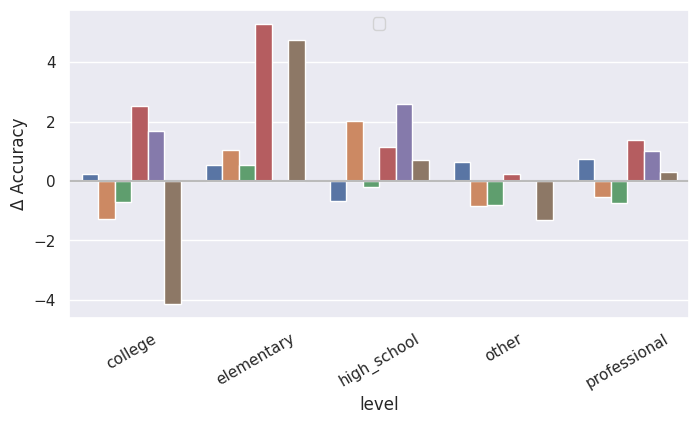

In [159]:
sns.set(rc={'figure.figsize':(8,4)})
pdf = multi_falcon_7b_diff_df.sort_values('model_index').groupby(['model_index','level','model'])['accuracy'].mean().reset_index()

pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
score_types = list(pdf['score_type'].unique())
colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

ax = sns.barplot(data=pdf, x='level', y='accuracy', hue='model', legend=None)
ax.axhline(0, ls='-', c='#BBBBBB')
plt.legend(ncols=2, loc='upper center')
plt.ylabel('Δ Accuracy')
plt.xticks(rotation=30)
plt.savefig('mmlu_level.png', bbox_inches='tight')
plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


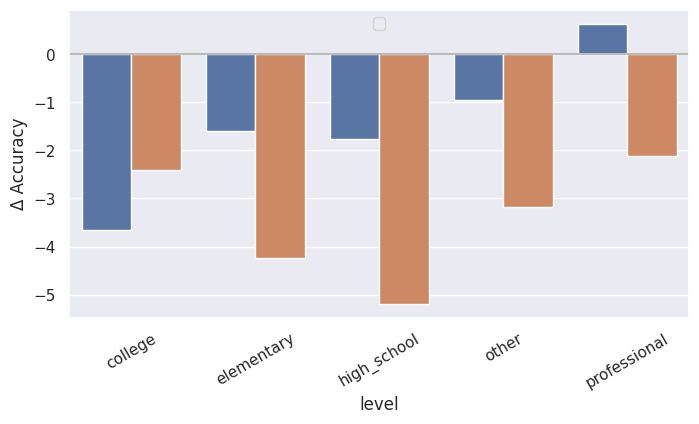

In [161]:
sns.set(rc={'figure.figsize':(8,4)})
pdf = multi_falcon_40b_diff_df.sort_values('model_index').groupby(['model_index','level','model'])['accuracy'].mean().reset_index()

pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
score_types = list(pdf['score_type'].unique())
colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

ax = sns.barplot(data=pdf, x='level', y='accuracy', hue='model', legend=None)
ax.axhline(0, ls='-', c='#BBBBBB')
plt.legend(ncols=2, loc='upper center')
plt.ylabel('Δ Accuracy')
plt.xticks(rotation=30)
plt.savefig('mmlu_level_40b.png', bbox_inches='tight')
plt.show()

# Per Category

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


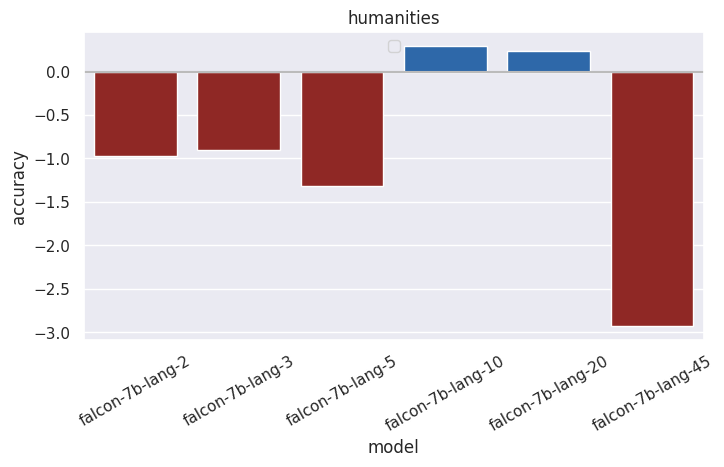

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


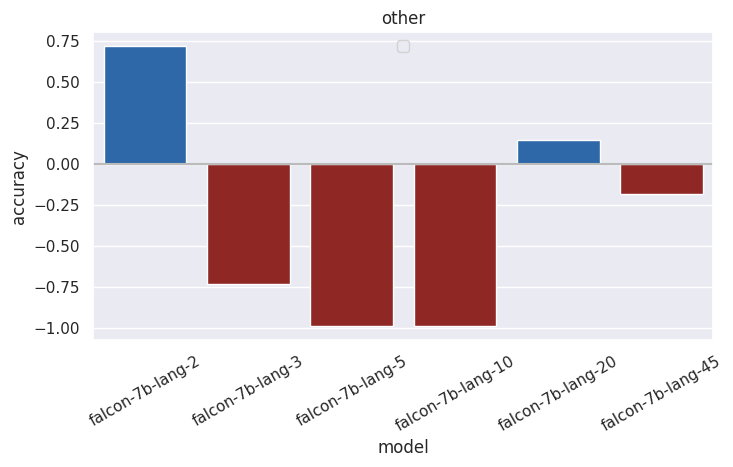

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


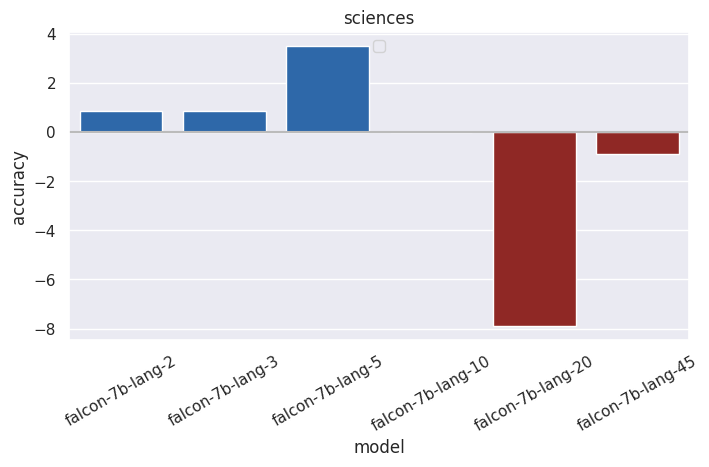

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


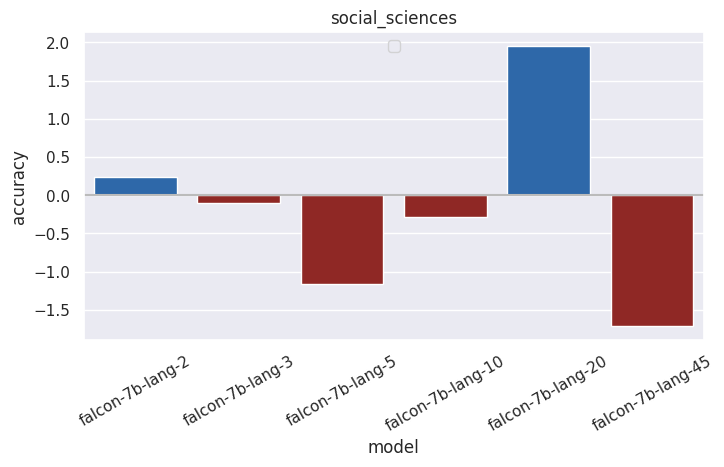

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


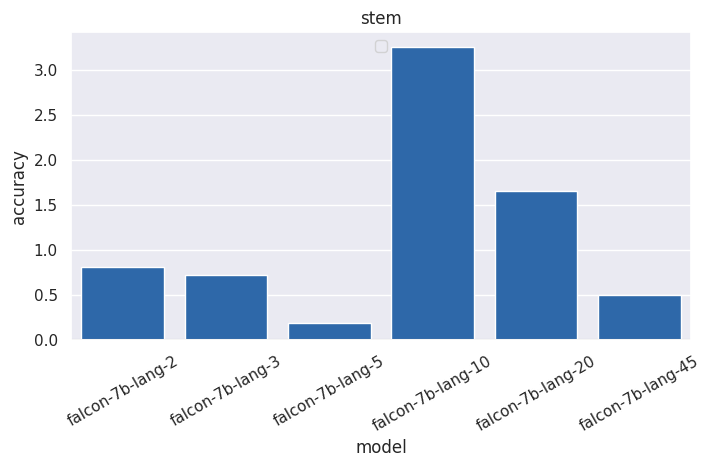

In [146]:
sns.set(rc={'figure.figsize':(8,4)})
for category in multi_falcon_7b_diff_df['category'].unique():
    pdf = multi_falcon_7b_diff_df.loc[
        multi_falcon_7b_diff_df['category'] == category
    ].sort_values('model_index').groupby(['model_index','model'])['accuracy'].mean().reset_index()
    
    pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
    score_types = list(pdf['score_type'].unique())
    colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

    ax = sns.barplot(data=pdf, x='model', y='accuracy', hue='score_type', legend=None, palette=colors)
    ax.axhline(0, ls='-', c='#BBBBBB')
    plt.legend(ncols=2, loc='upper center')
    plt.xticks(rotation=30)
    plt.title(category)
    plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


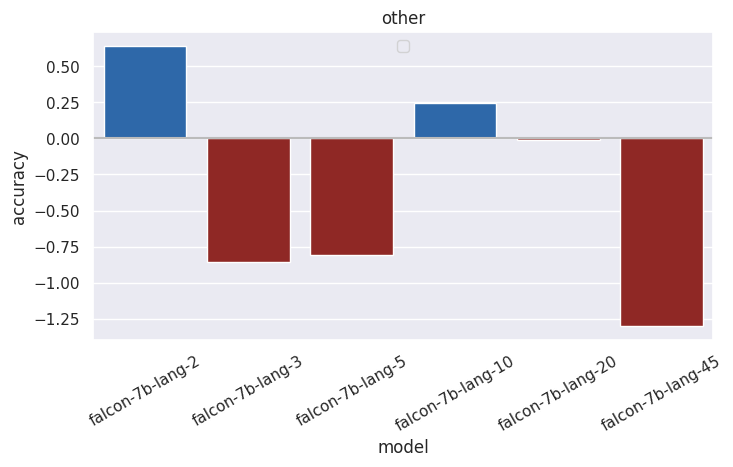

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


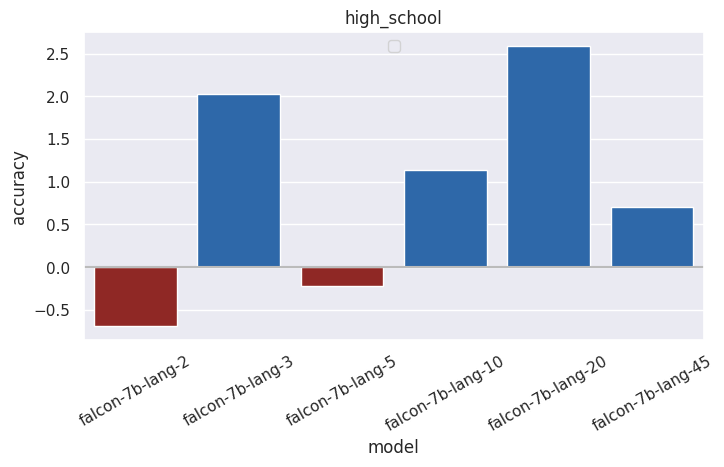

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


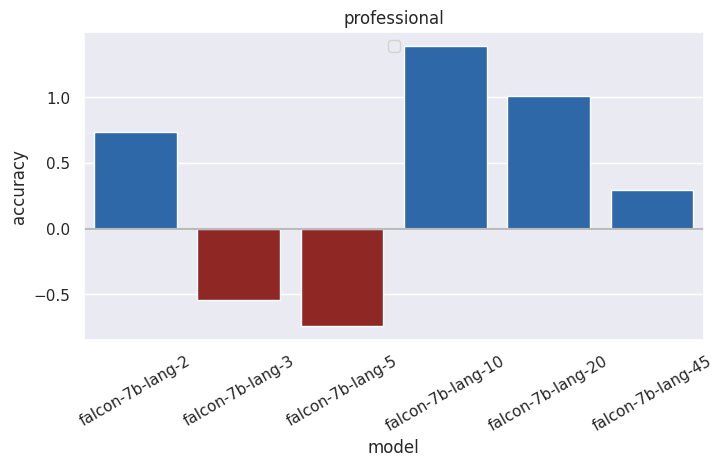

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


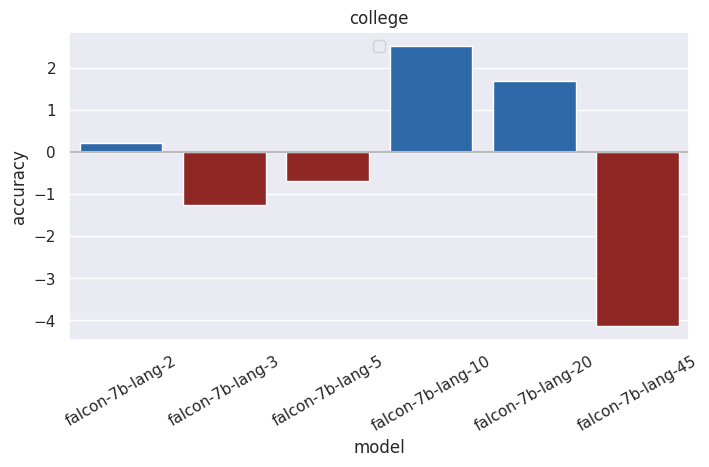

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


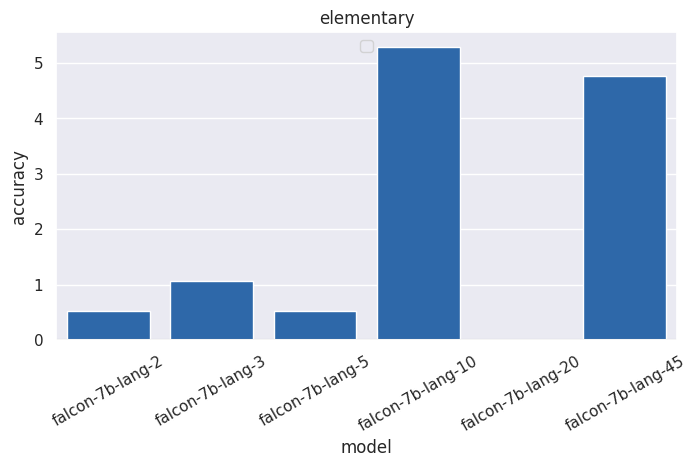

In [147]:
sns.set(rc={'figure.figsize':(8,4)})
for level in multi_falcon_7b_diff_df['level'].unique():
    pdf = multi_falcon_7b_diff_df.loc[
        multi_falcon_7b_diff_df['level'] == level
    ].sort_values('model_index').groupby(['model_index','model'])['accuracy'].mean().reset_index()

    pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
    score_types = list(pdf['score_type'].unique())
    colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

    ax = sns.barplot(data=pdf, x='model', y='accuracy', hue='score_type', legend=None, palette=colors)
    ax.axhline(0, ls='-', c='#BBBBBB')
    plt.legend(ncols=2, loc='upper center')
    plt.xticks(rotation=30)
    plt.title(level)
    plt.show()

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


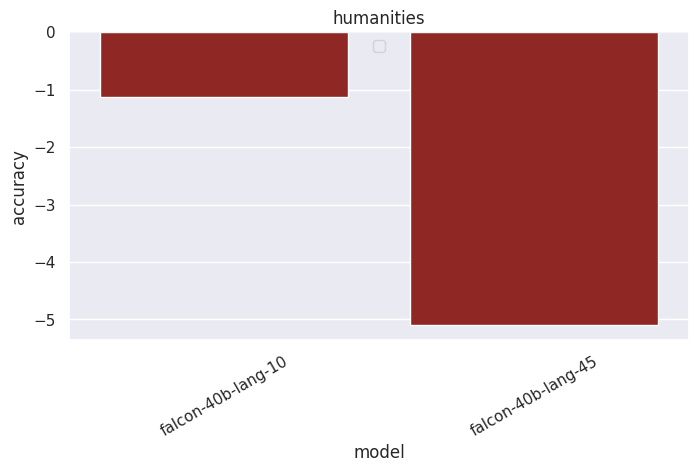

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


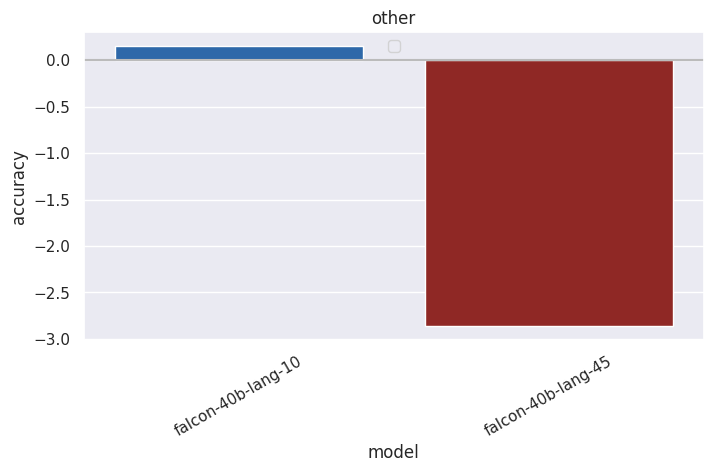

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


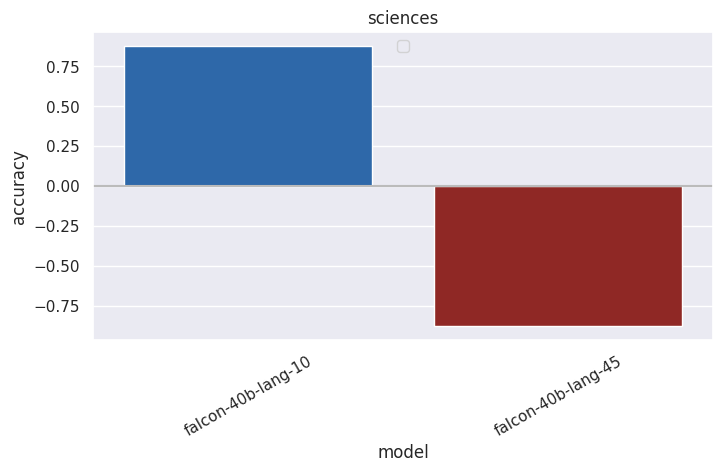

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


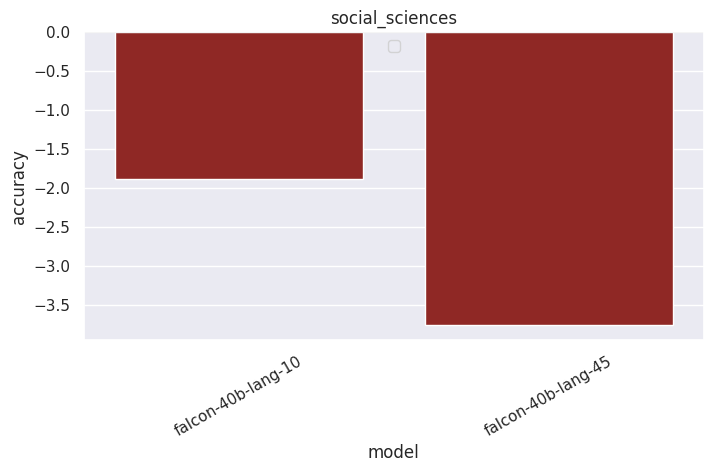

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


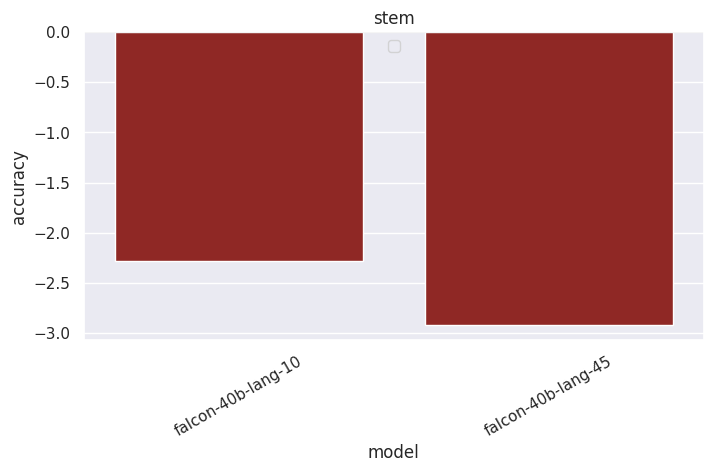

In [148]:
sns.set(rc={'figure.figsize':(8,4)})
for category in multi_falcon_40b_diff_df['category'].unique():
    pdf = multi_falcon_40b_diff_df.loc[
        multi_falcon_40b_diff_df['category'] == category
    ].sort_values('model_index').groupby(['model_index','model'])['accuracy'].mean().reset_index()
    
    pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
    score_types = list(pdf['score_type'].unique())
    colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

    ax = sns.barplot(data=pdf, x='model', y='accuracy', hue='score_type', legend=None, palette=colors)
    ax.axhline(0, ls='-', c='#BBBBBB')
    plt.legend(ncols=2, loc='upper center')
    plt.xticks(rotation=30)
    plt.title(category)
    plt.show()

# Per Level

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


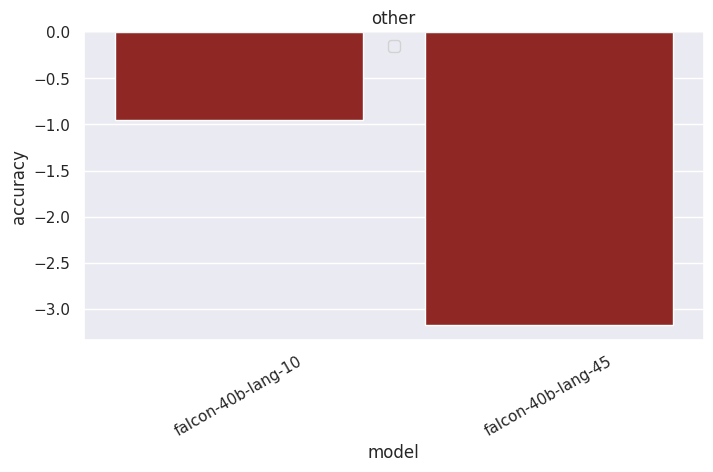

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


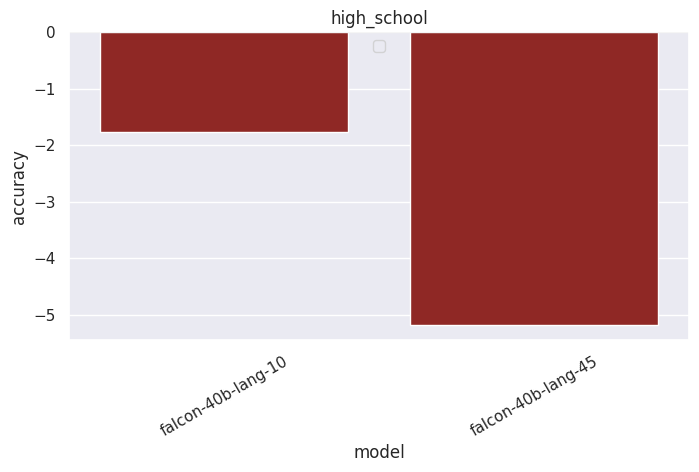

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


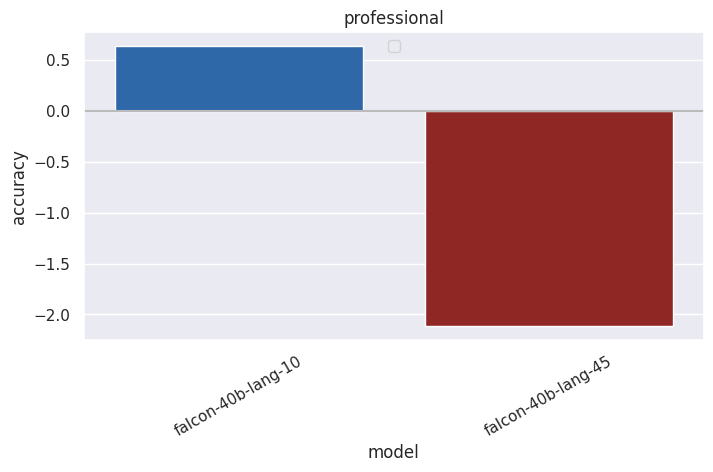

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


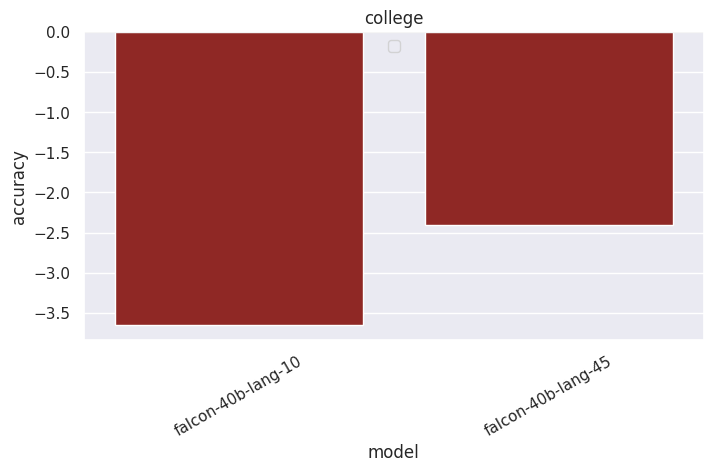

/home/scahyawijaya/anaconda3/envs/env_indot0/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


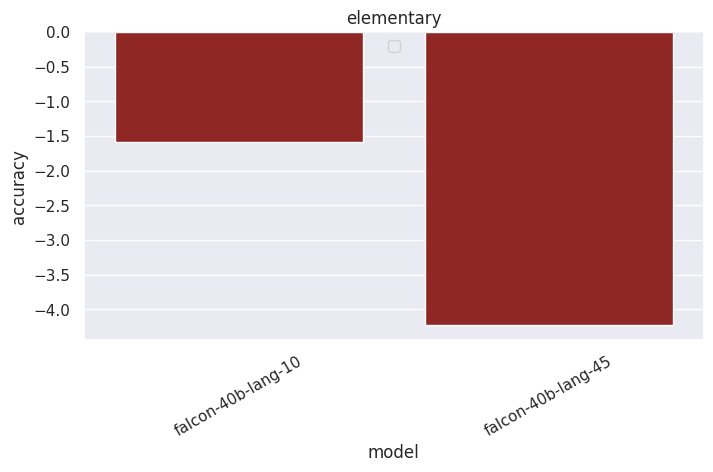

In [149]:
sns.set(rc={'figure.figsize':(8,4)})
for level in multi_falcon_40b_diff_df['level'].unique():
    pdf = multi_falcon_40b_diff_df.loc[
        multi_falcon_40b_diff_df['level'] == level
    ].sort_values('model_index').groupby(['model_index','model'])['accuracy'].mean().reset_index()

    pdf['score_type'] = pdf['accuracy'].apply(lambda x: 0 if x < 0 else 1)
    score_types = list(pdf['score_type'].unique())
    colors = (['#a11713'] if 0 in score_types else []) + (['#1a67bd'] if 1 in score_types else [])

    ax = sns.barplot(data=pdf, x='model', y='accuracy', hue='score_type', legend=None, palette=colors)
    ax.axhline(0, ls='-', c='#BBBBBB')
    plt.legend(ncols=2, loc='upper center')
    plt.xticks(rotation=30)
    plt.title(level)
    plt.show()